<a href="https://colab.research.google.com/github/antoinexp/markov-chains-COM-516/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is provided as a starting point to help you generate random instances G1 and G2 as mentioned in the handout.

You are free to use and modify it at your own convenience.

---



In [1]:
import scipy.stats as st
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
class DatasetGenerator(object):
  def __init__(self, N=100):
    self.N = N
    self.x = None
    self.v = None
    self.refresh()
  
  def refresh(self):
    raise Exception("undefined")

In [3]:
class G1(DatasetGenerator):
  def refresh(self):
    self.x = st.uniform().rvs((self.N,2))
    self.v = st.uniform().rvs((self.N,))

In [4]:
class G2(DatasetGenerator):
  def refresh(self):
    self.x = st.uniform().rvs((self.N,2))
    self.v = np.exp(st.norm(-0.85, 1.3).rvs((self.N,)))

### Uniform distribution ($\mathcal U([0,1])$)

In [5]:
g1 = G1()

Examples:

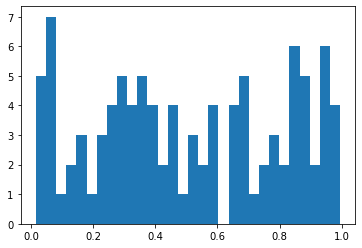

In [6]:
# Plot a histogram of the v array
plt.hist(g1.v, bins=30)
plt.show()

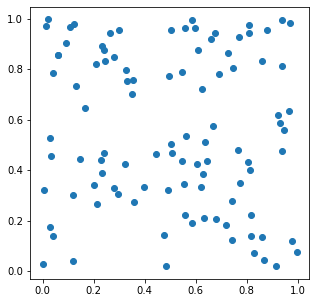

In [7]:
# plot the position of the points
plt.figure(figsize=(5,5))
plt.scatter(g1.x[:,0], g1.x[:,1])
plt.show()

You can refresh the dataset

In [8]:
g1.refresh() # generate a new dataset

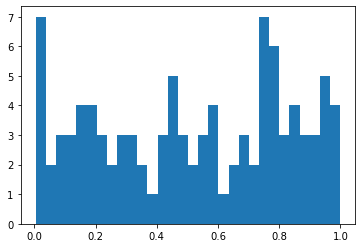

In [9]:
plt.hist(g1.v, bins=30)
plt.show()

Or for instance, you can generate 10 instances and compute the average position of all the points:

In [10]:
m = np.array([0., 0.])

for _ in range(10):
  g1.refresh() # refresh the dataset
  m  += 0.1*g1.x.mean()

print(m)

[0.49731286 0.49731286]


### Test on log-normal distribution

In [11]:
g2 = G2()

Example:

you can use g2 to generate an instance of the lognormal distribution

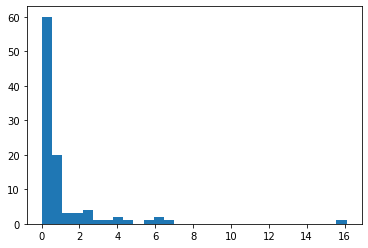

In [12]:
plt.hist(g2.v, bins=30)
plt.show()

In [13]:
g2.refresh() # to generate a new x and v

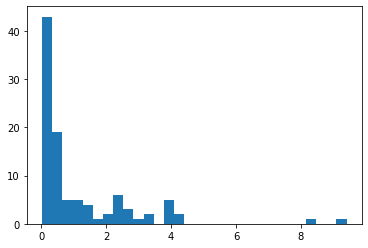

In [14]:
plt.hist(g2.v, bins=30)
plt.show()

---

### Metropolis Hastings

### **1. Implementation**

Implementation of Metropolis-Hastings algorithm to find an approximate solution of $S^*(\lambda)$

**Libraries**

In [15]:
from scipy.spatial import distance
import numpy as np

In [16]:
def d(x_i,x_j):
    """
    Compute the Euclidean distance between cities at positiion x_i and x_j.
    
    Parameters
    ----------
    x_i: ndarray of size 2 --> coordinate in space
    x_j: ndarray of size 2 --> coordinate in space
    
    Returns:
    --------
    d: Euclidean distance between the two points
    """
    return numpy.linalg.norm(x_i - x_j)

**Definition of the objective function**

In [41]:
def f(S, params):
    """
    Compute the objective function (that we want to maximize).
    
    Parameters
    ----------
    S: Subset of P({1,...,n}) as an array of shape (k,) with k an int in [1,n]
    params: tuple containing the fixed value of the deployment cost lambda_, as well as the fixed value of cities n. 
    It also contains an (n,2) array coords containing for each cities its coordinates and another (n,) array  pop with respective population.
    
    Returns
    -------
    f: The evaluated objective function.
    """
    
    lambda_, n, coords, pop = params
    
    #only consider coordinates of cities in S:
    coords_S = coords[S]
    pop_S = pop[S]

    return np.sum(pop_S) - lambda_ * n * np.pi() * (np.max(distance.cdist(coords_S, coords_S, 'euclidean')))**2 / 4

**Metropolis-Hastings algorithm**

### **2. Testing the implementation** 

Generate G_1 according to the generative model G1

In [31]:
G_1 = G1()

Definition of the set of parameters

In [42]:
lambdas_ = np.linspace(0,1,11)
n = 100
coords = G_1.x
pop = G_1.v

### Find a way to generate a S (to test the function f).

**Testing**

In [ ]:
for lambda_ in lambdas_:
    params = (lambdas_, n, coords, pop)
    f_eval = f(S, params)
    print(f_eval)
    

In [27]:
A = np.array([[1,2],[3,4],[5,6]])
M = np.array([1,2])
print(M.shape)
print(A[M])

(2,)
[[3 4]
 [5 6]]
